In [72]:
# Import libraries
import os
import requests
from zipfile import ZipFile
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FixedLocator
import numpy as np

In [85]:
# Define working directory
os.chdir('/Users/monlopez/Documents/MON/data_bases/covid-19/Mayo')

In [86]:
# Dowload ZipFile of Governmet webpage
# https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico
url = 'http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip'
r = requests.get(url)

with open('/Users/monlopez/Documents/MON/data_bases/covid-19/Mayo/datos_abiertos_covid19.zip', 'wb') as f:
    f.write(r.content)

In [87]:
# UnZip
with ZipFile('datos_abiertos_covid19.zip', 'r') as zipObj:
   # Extraxt zip contents in the working directory  
   zipObj.extractall()

In [88]:
# Import dataset
# The file name will change depending of the day
covid_19 = pd.read_csv("200503COVID19MEXICO.csv", encoding = "ISO-8859-1") 
covid_19=covid_19.dropna()

In [89]:
# Positive SARS-CoV-2
covid_yes = covid_19[covid_19.RESULTADO == 1]

In [90]:
# Plot
covid_si = (covid_yes.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
# Delet last column
covid_si= covid_si.drop(['2020-04-29'])

(0, 30000)

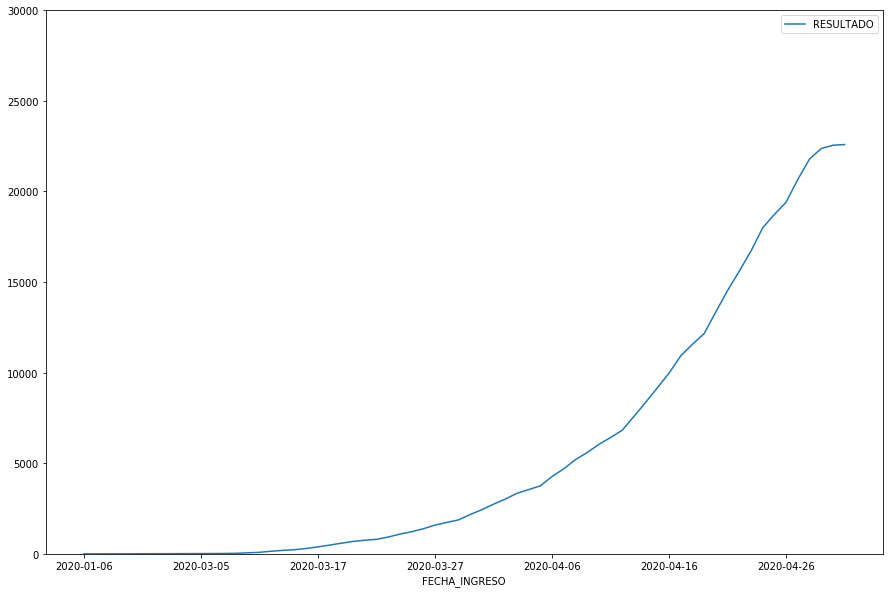

In [91]:
# Cumulative sum
plot1= covid_si.cumsum()[['RESULTADO']].plot(figsize=(15,10)) 
plot1.set_ylim([0, 30000])

In [92]:
# Grupping by result
resultado = covid_19.groupby('RESULTADO').count()
resultado = resultado[['FECHA_ACTUALIZACION']]
resultado

,FECHA_ACTUALIZACION
RESULTADO,
1,23471
2,59704
3,12664


In [100]:
# Total  
totales = resultado.FECHA_ACTUALIZACION.sum()
totales

95839

In [101]:
# Positive SARS-CoV-2
covid_yes = covid_19[covid_19.RESULTADO == 1]
covid_si = (covid_yes.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
positivos = covid_si.RESULTADO.sum()
positivos

23471

In [102]:
# Negative SARS-CoV-2
covid_no = covid_19[covid_19.RESULTADO == 2]
covid_no = (covid_no.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
negativos = covid_no.RESULTADO.sum()
negativos

59704

In [103]:
# Not confirmed SARS-CoV-2
covid_sosp = covid_19[covid_19.RESULTADO == 3]
covid_sosp = (covid_sosp.groupby(['FECHA_INGRESO'])['RESULTADO'].count()).to_frame()
sospechosos = covid_sosp.RESULTADO.sum()
sospechosos

12664

In [104]:
# Positive (%)
porcentaje_positivos = (positivos/totales) * 100
porcentaje_positivos

24.490030154738676

In [105]:
# Negative (%)
porcentaje_negativos = (negativos / totales) * 100
porcentaje_negativos

62.29614248896587

In [106]:
# Suspicious
porcentaje_sospechosos = (sospechosos / totales) * 100
porcentaje_sospechosos

13.213827356295454

In [107]:
# Confirmados + Sospechosos (%)
porcentaje_positivos + porcentaje_sospechosos

37.70385751103413

<BarContainer object of 3 artists>

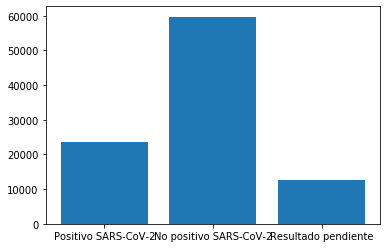

In [108]:
# data to plot
n_groups = 3
result = ('Positivo SARS-CoV-2', 'No positivo SARS-CoV-2', 'Resultado pendiente')
casos = (positivos, negativos, sospechosos)
# Create bars
plt.bar(result, casos)